In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
connection_string = 'mongodb://mongo1:27017,mongo2:27018,mongo3:27019/?replicaSet=rs0'

# Connecting to MongoDB
client = MongoClient(connection_string)

client.list_database_names()

['admin', 'config', 'local', 'newsDB']

In [3]:
db = client['newsDB']

In [4]:
list(db.list_collections())

[{'name': 'articles',
  'type': 'collection',
  'options': {},
  'info': {'readOnly': False,
   'uuid': Binary(b'\xdf\xdcA1\xd7>M\x82\xb6\x1fNI\xa1s\xf3n', 4)},
  'idIndex': {'v': 2, 'key': {'_id': 1}, 'name': '_id_'}}]

In [5]:
col = db['articles']

In [23]:
df = pd.DataFrame(list(col.find({})))

In [24]:
df.publishedAt = pd.to_datetime(df.publishedAt)

In [25]:
df = df.sort_values('publishedAt', ascending=True)

<Axes: xlabel='source'>

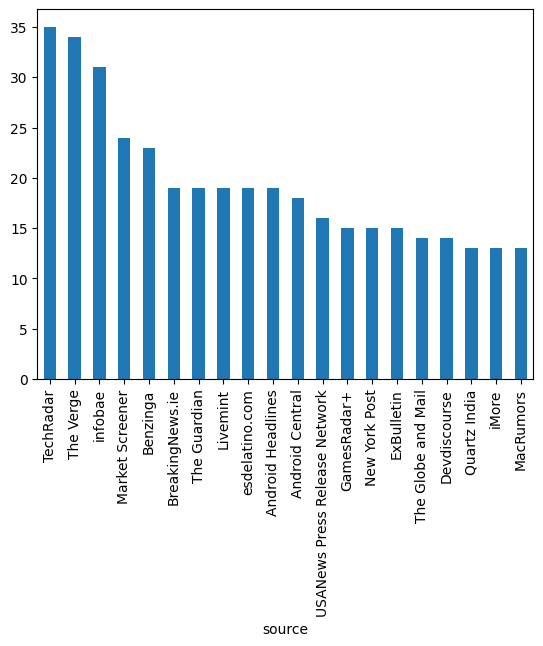

In [26]:
df.source.value_counts().sort_values(ascending=False)[:20].plot(kind='bar')

In [41]:
dates = df.publishedAt

In [42]:
counts = [df.publishedAt.value_counts()[c] for c in dates]

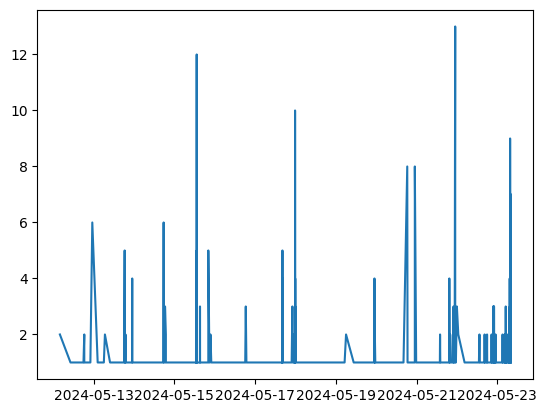

In [44]:
plt.plot(dates, counts)